<h1>Vehicle Fuel Economy Prediction</h1>

The goal of this project is to predict fuel consumption, aka 'combined MPG', from cars' attributes.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>regression</li>
  <li>discussion</li>
</ol>
This notebook includes steps 2-5.

Link to the dataset: https://www.kaggle.com/epa/fuel-economy

<b>Content</b><br>
The purpose of EPA’s fuel economy estimates is to provide a reliable basis for comparing vehicles. Most vehicles in the database (other than plug-in hybrids) have three fuel economy estimates: a “city” estimate that represents urban driving, in which a vehicle is started in the morning (after being parked all night) and driven in stop-and-go traffic; a “highway” estimate that represents a mixture of rural and interstate highway driving in a warmed-up vehicle, typical of longer trips in free-flowing traffic; and a “combined” estimate that represents a combination of city driving (55%) and highway driving (45%). Estimates for all vehicles are based on laboratory testing under standardized conditions to allow for fair comparisons.

The database provides annual fuel cost estimates, rounded to the nearest USD50, for each vehicle. The estimates are based on the assumptions that you travel 15,000 miles per year (55% under city driving conditions and 45% under highway conditions) and that fuel costs USD2.33/gallon for regular unleaded gasoline, $2.58/gallon for mid-grade unleaded gasoline, and USD2.82/gallon for premium.

EPA’s fuel economy values are good estimates of the fuel economy a typical driver will achieve under average driving conditions and provide a good basis to compare one vehicle to another. However, your fuel economy may be slightly higher or lower than EPA’s estimates. Fuel economy varies, sometimes significantly, based on driving conditions, driving style, and other factors.

<b>Acknowledgments</b><br>
Fuel economy data are produced during vehicle testing at the Environmental Protection Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers with EPA oversight.

<b>Results</b></br>
With the selected features energy output was predicted with RMSE_train of 2.92 and RMSE_test of 3.01 MPG. R2_train 0.94 and R2_test 0.94.

<h2>2. Feature Engineering</h2>

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
from dython import nominal
import dython
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for encoding
from feature_engine.encoding import OrdinalEncoder

# for quasi-constant values detection, validation and evaluation
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import shap

# for classification
import xgboost
from xgboost import XGBRegressor

In [5]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)
print('Dython version:',dython.__version__)
print('SHAP version:',shap.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90
Dython version: 0.7.2
SHAP version: 0.41.0


In [6]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [7]:
# importing the dataset
df = pd.read_csv("database.csv")
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

81 columns, 38113 rows
0 duplicated rows


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [8]:
# renaming columns
new_cols = [col.strip().replace(' ', '_') for col in df.columns]
cols_dict = dict(zip(df.columns, new_cols))
df.rename(cols_dict, axis=1, inplace=True)
df.head()

,Vehicle_ID,Year,Make,Model,Class,Drive,Transmission,Transmission_Descriptor,Engine_Index,Engine_Descriptor,Engine_Cylinders,Engine_Displacement,Turbocharger,Supercharger,Fuel_Type,Fuel_Type_1,Fuel_Type_2,City_MPG_(FT1),Unrounded_City_MPG_(FT1),City_MPG_(FT2),Unrounded_City_MPG_(FT2),City_Gasoline_Consumption_(CD),City_Electricity_Consumption,City_Utility_Factor,Highway_MPG_(FT1),Unrounded_Highway_MPG_(FT1),Highway_MPG_(FT2),Unrounded_Highway_MPG_(FT2),Highway_Gasoline_Consumption_(CD),Highway_Electricity_Consumption,Highway_Utility_Factor,Unadjusted_City_MPG_(FT1),Unadjusted_Highway_MPG_(FT1),Unadjusted_City_MPG_(FT2),Unadjusted_Highway_MPG_(FT2),Combined_MPG_(FT1),Unrounded_Combined_MPG_(FT1),Combined_MPG_(FT2),Unrounded_Combined_MPG_(FT2),Combined_Electricity_Consumption,Combined_Gasoline_Consumption_(CD),Combined_Utility_Factor,Annual_Fuel_Cost_(FT1),Annual_Fuel_Cost_(FT2),Gas_Guzzler_Tax,Save_or_Spend_(5_Year),Annual_Consumption_in_Barrels_(FT1),Annual_Consumption_in_Barrels_(FT2),Tailpipe_CO2_(FT1),Tailpipe_CO2_in_Grams/Mile_(FT1),Tailpipe_CO2_(FT2),Tailpipe_CO2_in_Grams/Mile_(FT2),Fuel_Economy_Score,GHG_Score,GHG_Score_(Alt_Fuel),My_MPG_Data,2D_Passenger_Volume,2D_Luggage_Volume,4D_Passenger_Volume,4D_Luggage_Volume,Hatchback_Passenger_Volume,Hatchback_Luggage_Volume,Start_Stop_Technology,Alternative_Fuel/Technology,Electric_Motor,Manufacturer_Code,Gasoline/Electricity_Blended_(CD),Vehicle_Charger,Alternate_Charger,Hours_to_Charge_(120V),Hours_to_Charge_(240V),Hours_to_Charge_(AC_240V),Composite_City_MPG,Composite_Highway_MPG,Composite_Combined_MPG,Range_(FT1),City_Range_(FT1),Highway_Range_(FT1),Range_(FT2),City_Range_(FT2),Highway_Range_(FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [9]:
# defining the target
target = 'Combined_MPG_(FT1)'

In [10]:
# dropping other possible targets, vehicle ID and electrical vehicles attributes
cols_to_trop = [
 'Vehicle_ID', 'City_MPG_(FT1)', 'Unrounded_City_MPG_(FT1)', 'City_MPG_(FT2)',
 'Unrounded_City_MPG_(FT2)', 'City_Gasoline_Consumption_(CD)',
 'City_Electricity_Consumption', 'City_Utility_Factor', 'Highway_MPG_(FT1)',
  'Unrounded_Highway_MPG_(FT1)', 'Highway_MPG_(FT2)',
  'Unrounded_Highway_MPG_(FT2)', 'Highway_Gasoline_Consumption_(CD)',
  'Highway_Electricity_Consumption', 'Highway_Utility_Factor',
  'Unadjusted_City_MPG_(FT1)', 'Unadjusted_Highway_MPG_(FT1)',
  'Unadjusted_City_MPG_(FT2)', 'Unadjusted_Highway_MPG_(FT2)',
  'Unrounded_Combined_MPG_(FT1)', 'Combined_MPG_(FT2)',
  'Unrounded_Combined_MPG_(FT2)', 'Combined_Electricity_Consumption',
  'Combined_Gasoline_Consumption_(CD)', 'Combined_Utility_Factor',
  'Annual_Fuel_Cost_(FT1)', 'Annual_Fuel_Cost_(FT2)', 'Gas_Guzzler_Tax',
  'Save_or_Spend_(5_Year)', 'Annual_Consumption_in_Barrels_(FT1)',
  'Annual_Consumption_in_Barrels_(FT2)', 'Tailpipe_CO2_(FT1)',
  'Tailpipe_CO2_in_Grams/Mile_(FT1)', 'Tailpipe_CO2_(FT2)',
  'Tailpipe_CO2_in_Grams/Mile_(FT2)', 'Fuel_Economy_Score', 'GHG_Score',
  'GHG_Score_(Alt_Fuel)', 'My_MPG_Data',  'Alternate_Charger',
  'Hours_to_Charge_(120V)', 'Hours_to_Charge_(240V)',
  'Hours_to_Charge_(AC_240V)', 'Composite_Highway_MPG',
  'Composite_Combined_MPG', 'Range_(FT1)', 'City_Range_(FT1)',
  'Highway_Range_(FT1)', 'Range_(FT2)', 'City_Range_(FT2)',
  'Highway_Range_(FT2)', 'Composite_City_MPG']
df.drop(columns=cols_to_trop, inplace=True)
df.columns

Index(['Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission_Descriptor', 'Engine_Index', 'Engine_Descriptor',
       'Engine_Cylinders', 'Engine_Displacement', 'Turbocharger',
       'Supercharger', 'Fuel_Type', 'Fuel_Type_1', 'Fuel_Type_2',
       'Combined_MPG_(FT1)', '2D_Passenger_Volume', '2D_Luggage_Volume',
       '4D_Passenger_Volume', '4D_Luggage_Volume',
       'Hatchback_Passenger_Volume', 'Hatchback_Luggage_Volume',
       'Start_Stop_Technology', 'Alternative_Fuel/Technology',
       'Electric_Motor', 'Manufacturer_Code',
       'Gasoline/Electricity_Blended_(CD)', 'Vehicle_Charger'],
      dtype='object')

In [11]:
# identifying categorical values
# capturing type object and boolean
cat_vars = [var for var in df.columns if df[var].dtype in ['O', 'bool']]
print(f"There are {len(cat_vars)} categorical variables")
cat_vars

There are 18 categorical variables


['Make',
 'Model',
 'Class',
 'Drive',
 'Transmission',
 'Transmission_Descriptor',
 'Engine_Descriptor',
 'Turbocharger',
 'Supercharger',
 'Fuel_Type',
 'Fuel_Type_1',
 'Fuel_Type_2',
 'Start_Stop_Technology',
 'Alternative_Fuel/Technology',
 'Electric_Motor',
 'Manufacturer_Code',
 'Gasoline/Electricity_Blended_(CD)',
 'Vehicle_Charger']

In [12]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars and var != target]
num_vars

['Year',
 'Engine_Index',
 'Engine_Cylinders',
 'Engine_Displacement',
 '2D_Passenger_Volume',
 '2D_Luggage_Volume',
 '4D_Passenger_Volume',
 '4D_Luggage_Volume',
 'Hatchback_Passenger_Volume',
 'Hatchback_Luggage_Volume']

<b>Updating variables list for selection</b>

In [13]:
num_vars.remove('Engine_Index')
print(f"There are {len(num_vars)} pre-selected numerical variables")
num_vars

There are 9 pre-selected numerical variables


['Year',
 'Engine_Cylinders',
 'Engine_Displacement',
 '2D_Passenger_Volume',
 '2D_Luggage_Volume',
 '4D_Passenger_Volume',
 '4D_Luggage_Volume',
 'Hatchback_Passenger_Volume',
 'Hatchback_Luggage_Volume']

In [14]:
cat_vars.remove('Model')
cat_vars.remove('Transmission_Descriptor')
cat_vars.remove('Engine_Descriptor')
cat_vars.remove('Fuel_Type')
cat_vars.remove('Alternative_Fuel/Technology')
cat_vars.remove('Electric_Motor')
cat_vars.remove('Manufacturer_Code')
cat_vars.remove('Gasoline/Electricity_Blended_(CD)')
cat_vars.remove('Vehicle_Charger')
print(f"There are {len(cat_vars)} pre-selected categorical variables")
cat_vars

There are 9 pre-selected categorical variables


['Make',
 'Class',
 'Drive',
 'Transmission',
 'Turbocharger',
 'Supercharger',
 'Fuel_Type_1',
 'Fuel_Type_2',
 'Start_Stop_Technology']

In [15]:
# defining X and y
X = df[cat_vars + num_vars]
y = df[target]
del df

In [16]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 42)

<b>Null values</b>

Supercharger

In [17]:
X_train['Supercharger'][X_train['Supercharger'].isnull() == True] = 'A'
X_test['Supercharger'][X_test['Supercharger'].isnull() == True] = 'A'
X_train['Supercharger'].value_counts(dropna=False)

A    33676
S      625
Name: Supercharger, dtype: int64

Fuel_Type_2

In [18]:
X_train['Fuel_Type_2'][X_train['Fuel_Type_2'].isnull() == True] = 'na'
X_test['Fuel_Type_2'][X_test['Fuel_Type_2'].isnull() == True] = 'na'
X_train['Fuel_Type_2'].value_counts(dropna=False)

na             32990
E85             1228
Electricity       55
Natural Gas       20
Propane            8
Name: Fuel_Type_2, dtype: int64

In [19]:
X_test['Fuel_Type_2'].value_counts(dropna=False)

na             3685
E85             117
Electricity      10
Name: Fuel_Type_2, dtype: int64

Turbocharger

In [20]:
X_train['Turbocharger'][X_train['Turbocharger'].isnull() == True] = 'A'
X_test['Turbocharger'][X_test['Turbocharger'].isnull() == True] = 'A'
X_train['Turbocharger'].value_counts(dropna=False)

A    29593
T     4708
Name: Turbocharger, dtype: int64

Start_Stop_Technology

In [21]:
X_train['Start_Stop_Technology'][
    X_train['Start_Stop_Technology'].isnull() == True] = 'N'
X_test['Start_Stop_Technology'][
    X_test['Start_Stop_Technology'].isnull() == True] = 'N'
X_train['Start_Stop_Technology'].value_counts(dropna=False)

N    32713
Y     1588
Name: Start_Stop_Technology, dtype: int64

Drive

In [22]:
X_train['Drive'][X_train['Drive'].isnull() == True] = '2-Wheel Drive'
X_test['Drive'][X_test['Drive'].isnull() == True] = '2-Wheel Drive'
X_train['Drive'].value_counts(dropna=False)

Front-Wheel Drive             11994
Rear-Wheel Drive              11714
4-Wheel or All-Wheel Drive     6027
All-Wheel Drive                1918
2-Wheel Drive                  1489
4-Wheel Drive                   998
Part-time 4-Wheel Drive         161
Name: Drive, dtype: int64

Engine_Cylinders

In [23]:
X_train['Engine_Cylinders'][X_train['Engine_Cylinders'].isnull() == True] = 4.0
X_test['Engine_Cylinders'][X_test['Engine_Cylinders'].isnull() == True] = 4.0
X_train['Engine_Cylinders'].value_counts(dropna=False)

4.0     13214
6.0     11958
8.0      7543
5.0       688
12.0      510
3.0       196
10.0      141
2.0        44
16.0        7
Name: Engine_Cylinders, dtype: int64

Engine_Displacement

In [24]:
X_train['Engine_Displacement'][
    X_train['Engine_Displacement'].isnull() == True
       ] = X_train['Engine_Displacement'].mean()

X_test['Engine_Displacement'][
    X_test['Engine_Displacement'].isnull() == True
       ] = X_train['Engine_Displacement'].mean()

Imputing mean to Engine_Displacement might make a leakage.

Transmission

In [25]:
X_train['Transmission'][
    X_train['Transmission'].isnull() == True] = 'Automatic 4-Speed'
X_test['Transmission'][
    X_test['Transmission'].isnull() == True] = 'Automatic 4-Speed'
X_train['Transmission'].value_counts(dropna=False)

Automatic 4-Speed                   9914
Manual 5-Speed                      7474
Automatic 3-Speed                   2862
Automatic (S6)                      2414
Manual 6-Speed                      2220
Automatic 5-Speed                   1977
Manual 4-Speed                      1332
Automatic 6-Speed                   1311
Automatic (S8)                       878
Automatic (S5)                       753
Automatic (variable gear ratios)     626
Automatic 7-Speed                    606
Automatic (S7)                       253
Auto(AM-S7)                          241
Automatic 8-Speed                    227
Automatic (S4)                       215
Auto(AM7)                            144
Auto(AV-S6)                          139
Automatic (A1)                       110
Auto(AM6)                            100
Automatic 9-Speed                     99
Auto(AM-S6)                           78
Manual 3-Speed                        71
Auto(AV-S7)                           69
Manual 7-Speed  

In [26]:
# making list of the variables
# that contain missing values in train and test sets
[[var for var in X_train.columns if X_train[var].isnull().sum() > 0], 
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]]

[[], []]

<b>Editing categorical variables</b>

Variables to elaborate are 'Class', 'Drive', 'Transmission', 'Fuel_Type_1' and 'Fuel_Type_2'.

Class

In [27]:
X_train['Class'].value_counts(dropna=False)

Compact Cars                          4980
Subcompact Cars                       4372
Midsize Cars                          3925
Standard Pickup Trucks                2115
Sport Utility Vehicle - 4WD           1889
Large Cars                            1706
Two Seaters                           1671
Sport Utility Vehicle - 2WD           1467
Small Station Wagons                  1359
Special Purpose Vehicles              1332
Minicompact Cars                      1127
Standard Pickup Trucks 2WD            1067
Vans                                  1018
Standard Pickup Trucks 4WD             898
Midsize-Large Station Wagons           575
Special Purpose Vehicle 2WD            548
Small Pickup Trucks                    496
Midsize Station Wagons                 471
Small Sport Utility Vehicle 4WD        464
Standard Sport Utility Vehicle 4WD     402
Small Pickup Trucks 2WD                394
Vans, Cargo Type                       386
Small Sport Utility Vehicle 2WD        358
Minivan - 2

In [28]:
def edit_class(data):
    data['Class'][data['Class'].str.contains("Van")] = 'Van'
    data['Class'][
        data['Class'].str.contains("Special")] = 'Special Purpose Vehicle'
    data['Class'][
        data['Class'].str.contains("Sport Utility")] = 'Sport Utility Vehicle'
    data['Class'][
        data['Class'].str.contains("Standard Pickup")] = 'Standard Pickup Truck'
    data['Class'][
        data['Class'].str.contains("Small Pickup")] = 'Small Pickup Truck'
    data['Class'][data['Class'].str.contains("Minivan")] = 'Minivan'
    data['Class'][data['Class'].str.contains("Midsize")] = 'Midsize Car'
    data['Class'][data['Class'].str.contains("compact")] = 'Subcompact Car'

    data['Drive'][data['Drive'] == 'Compact Cars'] = 'Compact Car'
    data['Drive'][data['Drive'] == 'Large Car'] = 'Large Car'
    data['Drive'][data['Drive'] == 'Two Seaters'] = 'Two Seater'
    return

edit_class(X_train)
edit_class(X_test)
X_train['Class'].value_counts(dropna=False)

Subcompact Car             5499
Compact Cars               4980
Midsize Car                4971
Sport Utility Vehicle      4747
Standard Pickup Truck      4084
Special Purpose Vehicle    2163
Large Cars                 1706
Van                        1691
Two Seaters                1671
Small Station Wagons       1359
Small Pickup Truck         1080
Minivan                     350
Name: Class, dtype: int64

In [29]:
X_test['Class'].value_counts(dropna=False)

Subcompact Car             633
Midsize Car                603
Compact Cars               528
Sport Utility Vehicle      507
Standard Pickup Truck      437
Two Seaters                215
Special Purpose Vehicle    212
Van                        201
Large Cars                 185
Small Station Wagons       140
Small Pickup Truck         112
Minivan                     39
Name: Class, dtype: int64

Drive

In [30]:
X_train['Drive'].value_counts(dropna=False)

Front-Wheel Drive             11994
Rear-Wheel Drive              11714
4-Wheel or All-Wheel Drive     6027
All-Wheel Drive                1918
2-Wheel Drive                  1489
4-Wheel Drive                   998
Part-time 4-Wheel Drive         161
Name: Drive, dtype: int64

In [31]:
def edit_drive(data):
    data['Drive'][
        data['Drive'] == '4-Wheel or All-Wheel Drive'] = '4-Wheel Drive'
    data['Drive'][
        data['Drive'] == 'All-Wheel Drive'] = '4-Wheel Drive'
    data['Drive'][
        data['Drive'] == 'Part-time 4-Wheel Drive'] = '2-Wheel Drive'
    data['Drive'][data['Drive'] == '2-Wheel Drive'] = 'Front-Wheel Drive'

edit_drive(X_train)
edit_drive(X_test)
X_train['Drive'].value_counts(dropna=False)

Front-Wheel Drive    13644
Rear-Wheel Drive     11714
4-Wheel Drive         8943
Name: Drive, dtype: int64

In [32]:
X_test['Drive'].value_counts(dropna=False)

Front-Wheel Drive    1579
Rear-Wheel Drive     1304
4-Wheel Drive         929
Name: Drive, dtype: int64

Transmission

In [33]:
X_train['Transmission'].value_counts(dropna=False)

Automatic 4-Speed                   9914
Manual 5-Speed                      7474
Automatic 3-Speed                   2862
Automatic (S6)                      2414
Manual 6-Speed                      2220
Automatic 5-Speed                   1977
Manual 4-Speed                      1332
Automatic 6-Speed                   1311
Automatic (S8)                       878
Automatic (S5)                       753
Automatic (variable gear ratios)     626
Automatic 7-Speed                    606
Automatic (S7)                       253
Auto(AM-S7)                          241
Automatic 8-Speed                    227
Automatic (S4)                       215
Auto(AM7)                            144
Auto(AV-S6)                          139
Automatic (A1)                       110
Auto(AM6)                            100
Automatic 9-Speed                     99
Auto(AM-S6)                           78
Manual 3-Speed                        71
Auto(AV-S7)                           69
Manual 7-Speed  

In [34]:
def edit_transmission(data):
    data['Transmission'][(data['Transmission'].str.contains("Manual")) &
                    (data['Transmission'].str.contains("3"))] = 'M3'
    data['Transmission'][(data['Transmission'].str.contains("Manual")) &
                    (data['Transmission'].str.contains("4"))] = 'M4'
    data['Transmission'][(data['Transmission'].str.contains("Manual")) &
                    (data['Transmission'].str.contains("5"))] = 'M5'
    data['Transmission'][(data['Transmission'].str.contains("Manual")) &
                    (data['Transmission'].str.contains("6"))] = 'M6'
    data['Transmission'][(data['Transmission'].str.contains("Manual")) &
                    (data['Transmission'].str.contains("7"))] = 'M7'

    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("3"))] = 'A3'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("4"))] = 'A4'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("5"))] = 'A5'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("6"))] = 'A6'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("7"))] = 'A7'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("8"))] = 'A8'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("9"))] = 'A9'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("10"))] = 'A9'

    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("variable|AV"))] = 'AV'
    data['Transmission'][(data['Transmission'].str.contains("Auto")) &
                    (data['Transmission'].str.contains("A1"))] = 'AA1'

edit_transmission(X_train)
edit_transmission(X_test)
X_train['Transmission'].value_counts(dropna=False)

A4     10131
M5      7474
A6      4057
A3      2864
A5      2744
M6      2220
M4      1347
A7      1313
A8      1137
AV       632
A9       132
AA1      110
M3        71
M7        69
Name: Transmission, dtype: int64

In [35]:
X_test['Transmission'].value_counts(dropna=False)

A4     1157
M5      850
A6      450
A3      289
A5      288
M6      228
M4      153
A7      144
A8      139
AV       76
AA1      14
A9       11
M7        7
M3        6
Name: Transmission, dtype: int64

Fuel_Type_1

In [36]:
X_train['Fuel_Type_1'].value_counts(dropna=False)

Regular Gasoline     23875
Premium Gasoline      9260
Diesel                 923
Electricity            120
Midgrade Gasoline       68
Natural Gas             55
Name: Fuel_Type_1, dtype: int64

In [37]:
X_train['Fuel_Type_1'][
    X_train['Fuel_Type_1'].str.contains("Gasoline")] = 'Gasoline'
X_test['Fuel_Type_1'][
    X_test['Fuel_Type_1'].str.contains("Gasoline")] = 'Gasoline'
X_train['Fuel_Type_1'].value_counts(dropna=False)

Gasoline       33203
Diesel           923
Electricity      120
Natural Gas       55
Name: Fuel_Type_1, dtype: int64

In [38]:
X_test['Fuel_Type_1'].value_counts(dropna=False)

Gasoline       3703
Diesel           91
Electricity      13
Natural Gas       5
Name: Fuel_Type_1, dtype: int64

Fuel_Type_2

In [39]:
X_train['Fuel_Type_2'].value_counts(dropna=False)

na             32990
E85             1228
Electricity       55
Natural Gas       20
Propane            8
Name: Fuel_Type_2, dtype: int64

In [40]:
X_train['Fuel_Type_2'][X_train['Fuel_Type_2'] == 'Natural Gas'] = 'Gas'
X_train['Fuel_Type_2'][X_train['Fuel_Type_2'] == 'Propane'] = 'Gas'

X_test['Fuel_Type_2'][X_test['Fuel_Type_2'] == 'Natural Gas'] = 'Gas'
X_test['Fuel_Type_2'][X_test['Fuel_Type_2'] == 'Propane'] = 'Gas'
X_train['Fuel_Type_2'].value_counts(dropna=False)

na             32990
E85             1228
Electricity       55
Gas               28
Name: Fuel_Type_2, dtype: int64

In [41]:
X_test['Fuel_Type_2'].value_counts(dropna=False)

na             3685
E85             117
Electricity      10
Name: Fuel_Type_2, dtype: int64

<b>Ordinal feature encoding</b>

In [42]:
ordinal_enc = OrdinalEncoder(encoding_method='ordered', variables=cat_vars)
ordinal_enc.fit(X_train, y_train)
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)
X_test.head()

,Make,Class,Drive,Transmission,Turbocharger,Supercharger,Fuel_Type_1,Fuel_Type_2,Start_Stop_Technology,Year,Engine_Cylinders,Engine_Displacement,2D_Passenger_Volume,2D_Luggage_Volume,4D_Passenger_Volume,4D_Luggage_Volume,Hatchback_Passenger_Volume,Hatchback_Luggage_Volume
1876,114.0,9,2,10,0,1,1,2,0,1984,4.0,1.7,78,13,77,13,0,0
3886,67.0,2,0,10,0,1,1,2,0,1986,4.0,2.5,0,0,0,0,0,0
28472,109.0,11,1,1,1,1,1,2,0,2009,4.0,2.5,0,0,94,19,0,0
30805,107.0,4,2,7,0,1,1,2,0,2011,6.0,3.5,0,0,0,0,0,0
15027,68.0,2,0,1,0,1,1,2,0,1996,6.0,4.0,0,0,0,0,0,0


<h2>3. Feature Selection</h2>

<b>Correlated numerical features<b>

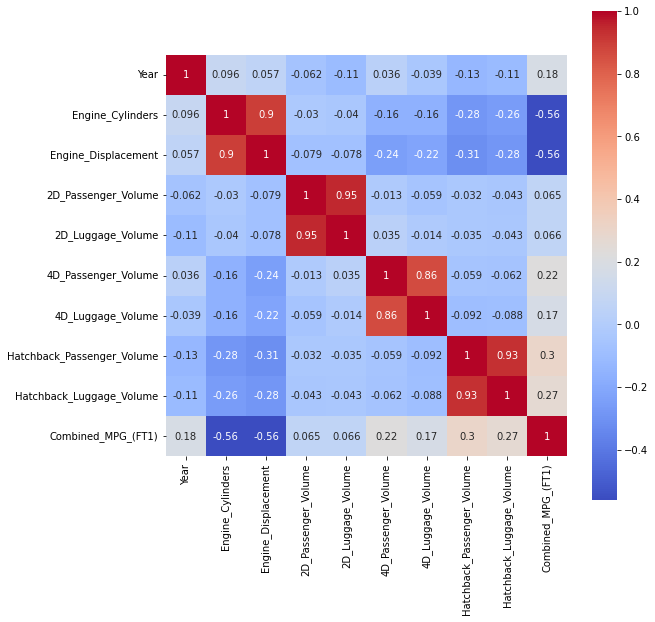

In [43]:
# calculating a correlation matrix
df_corr = X_train[num_vars].copy()
df_corr['Combined_MPG_(FT1)'] = y_train
corr_matrix = df_corr.corr()
del df_corr
plt.figure(figsize = (9, 9))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

4 pairs of fatures are significantly correlated:<br>
'Engine_Cylinders' and 'Engine_Displacement'<br>
'2D_Passenger_Volume' and '2D_Luggage_Volume'<br>
'4D_Passenger_Volume' and '4D_Luggage_Volume'<br>
'Hatchback_Passenger_Volume' and 'Hatchback_Luggage_Volume'<br>
Dropping less correlated to the target:<br>
['Engine_Displacement', '2D_Passenger_Volume', '4D_Luggage_Volume', 'Hatchback_Luggage_Volume']



In [44]:
cols_to_trop = ['Engine_Displacement', '2D_Passenger_Volume',
                '4D_Luggage_Volume', 'Hatchback_Luggage_Volume']

for col in cols_to_trop:
    num_vars.remove(col)
print(num_vars)

X_train.drop(columns=cols_to_trop, inplace=True)
print(X_train[num_vars].columns)

X_test.drop(columns=cols_to_trop, inplace=True)
print(X_test[num_vars].columns)

['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume', 'Hatchback_Passenger_Volume']
Index(['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume',
       'Hatchback_Passenger_Volume'],
      dtype='object')
Index(['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume',
       'Hatchback_Passenger_Volume'],
      dtype='object')


<b>Correlated categorical features<b>

Calculating the correlation/strength-of-association of features in data-set with both categorical and continuous features using:<br>
<ul>
  <li>Pearson's R for continuous-continuous cases</li>
  <li>Correlation Ratio for categorical-continuous cases</li>
  <li>Cramer's V or Theil's U for categorical-categorical cases</li>
</ul>

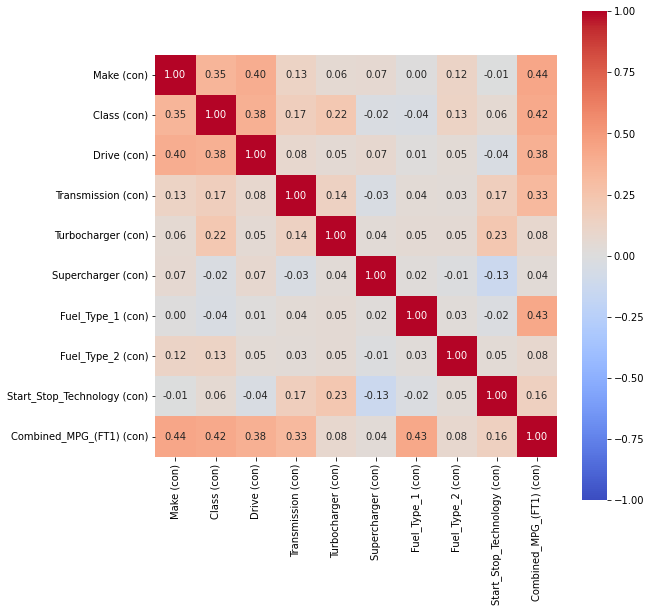

In [45]:
# calculating a correlation matrix
df_corr = X_train[cat_vars].copy()
df_corr['Combined_MPG_(FT1)'] = y_train
nominal.associations(df_corr, figsize=(9, 9), mark_columns=True,
                     cmap='coolwarm')
del df_corr;

Discussion: 'Turbocharger', 'Supercharger' and 'Fuel_Type_2' are correlated less then 10%.

Inter-correlated numerical features

In [46]:
cols_to_trop = [ 'Turbocharger', 'Supercharger',  'Fuel_Type_2']

for col in cols_to_trop:
    cat_vars.remove(col)
print(num_vars)

X_train.drop(columns=cols_to_trop, inplace=True)
print(X_train[num_vars].columns)

X_test.drop(columns=cols_to_trop, inplace=True)
print(X_test[num_vars].columns)

['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume', 'Hatchback_Passenger_Volume']
Index(['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume',
       'Hatchback_Passenger_Volume'],
      dtype='object')
Index(['Year', 'Engine_Cylinders', '2D_Luggage_Volume', '4D_Passenger_Volume',
       'Hatchback_Passenger_Volume'],
      dtype='object')


In [47]:
# making a list of the features
features = num_vars + cat_vars
print(f"There are {len(features)} features")

There are 11 features


<b>Feature shuffling</b>

In [48]:
# modeling with all the features

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, n_estimators=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[05:23:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:23:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [49]:
# modeling with one variable shaffled per iteration
for var in features:
    X_train_shuffled = X_train.copy()
    X_test_shuffled = X_test.copy()
    X_train_shuffled[var] =  X_train_shuffled[var].sample(frac=1).values
    X_test_shuffled[var] =  X_test_shuffled[var].sample(frac=1).values
    # defining a regressor
    regressor_xg = XGBRegressor(max_depth=4, n_estimators=200, random_state = 42)
    # fitting the regressor and predicting y_test
    regressor_xg.fit(X_train_shuffled, y_train)
    y_pred = regressor_xg.predict(X_test_shuffled)
    # evaluation
    y_train_hat = regressor_xg.predict(X_train_shuffled)
    print()
    print(f"Shuffled {var}")
    print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
    print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
    print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
    print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[05:24:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Year
RMSE train: 3.12
RMSE test : 3.31
r2 train  : 0.93
r2 test   : 0.93
[05:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled Engine_Cylinders
RMSE train: 4.94
RMSE test : 5.03
r2 train  : 0.89
r2 test   : 0.90
[05:24:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled 2D_Luggage_Volume
RMSE train: 2.65
RMSE test : 2.85
r2 train  : 0.94
r2 test   : 0.94
[05:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Shuffled 4D_Passenger_Volume
RMSE train: 2.73
RMSE test : 2.88
r2 train  : 0.94
r2 test   : 0.94
[05:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squared

Discussion: these features don't influence the target:
['2D_Luggage_Volume', '4D_Passenger_Volume', 'Hatchback_Passenger_Volume']

In [50]:
cols_to_trop = ['2D_Luggage_Volume', '4D_Passenger_Volume',
                'Hatchback_Passenger_Volume']

for col in cols_to_trop:
    num_vars.remove(col)
print(num_vars)

X_train.drop(columns=cols_to_trop, inplace=True)
print(X_train[num_vars].columns)

X_test.drop(columns=cols_to_trop, inplace=True)
print(X_test[num_vars].columns)

['Year', 'Engine_Cylinders']
Index(['Year', 'Engine_Cylinders'], dtype='object')
Index(['Year', 'Engine_Cylinders'], dtype='object')


In [51]:
# making a list of the features
features = num_vars + cat_vars
print(f"There are {len(features)} features")

There are 8 features


<h2>4. Regression</h2>

In [52]:
# modeling with the selected features

# defining a regressor
regressor_xg = XGBRegressor(max_depth=4, n_estimators=200, random_state = 42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X = X_train, y = y_train, cv = 10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.2f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.2f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.2f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.2f}")

[05:24:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<b>Feature importance with SHAP</b>

[05:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


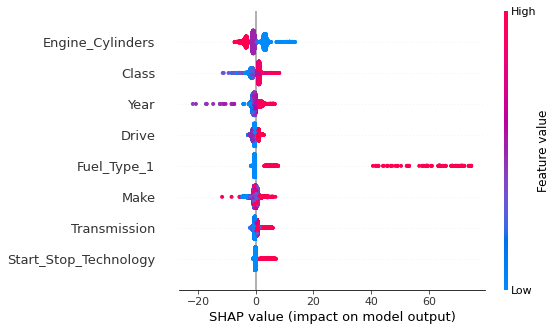

In [53]:
# defining data frames X and y
X_shap = X_train.append(X_test)
y_shap = y_train.append(y_test)

# fitting xgb
model = XGBRegressor(max_depth=4, n_estimators=200, random_state = 42)
model.fit(X_shap, y_shap)
# loading JS visualization code to notebook
shap.initjs()
# calculating shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)
# plotting feature importance
shap.summary_plot(shap_values, features=X_shap, feature_names=X_shap.columns)

<h1>5. Discussion</h1>

With the selected features energy output was predicted with RMSE_train of 2.92 and RMSE_test of 3.01 MPG. R2_train 0.94 and R2_test 0.94.